K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [2]:
clu = pd.read_csv("/content/unsupervised_dataset.csv")

In [4]:
clu.head()

,Feature1,Feature2
0,5.496714,4.861736
1,5.647689,6.523030
2,4.765847,4.765863
3,6.579213,5.767435
4,4.530526,5.542560


In [6]:
clu.columns

Index(['Feature1', 'Feature2'], dtype='object')

<Axes: xlabel='Feature1', ylabel='Feature2'>

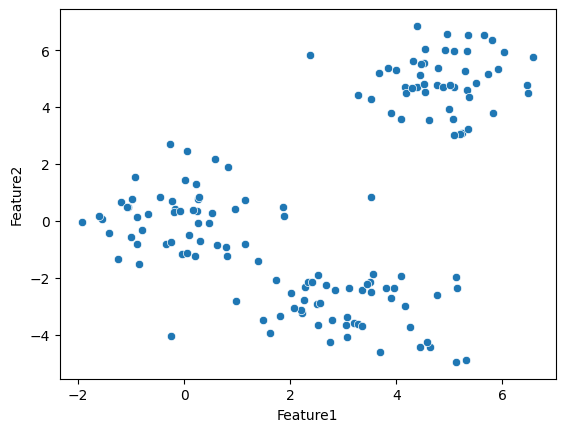

In [7]:
sns.scatterplot(x=clu["Feature1"],y=clu["Feature2"])

In [23]:
cluster_errors = []
for i in range(1,6):
  kmeans = KMeans(n_clusters=i,init="random",random_state=42)
  kmeans.fit(clu)
  cluster_errors.append(kmeans.inertia_)

In [24]:
print(cluster_errors)

[2513.2848712810946, 792.470013074332, 284.170328893534, 247.9140100577729, 206.22977050953344]


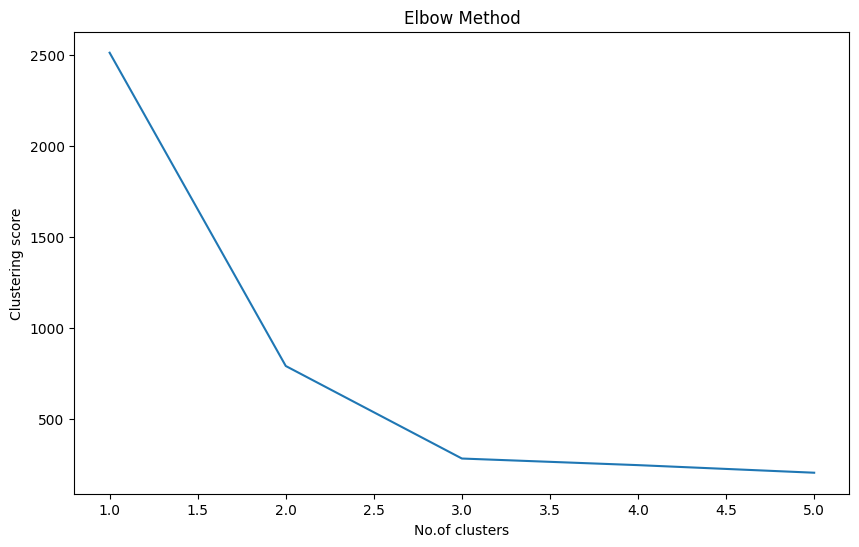

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,6),cluster_errors)
plt.title("Elbow Method")
plt.xlabel("No.of clusters")
plt.ylabel("Clustering score")
plt.show()

In [26]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(clu)
pred = kmeans.predict(clu)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [27]:
clu["Clusters"] = pd.DataFrame(pred,columns=["Clusters"])

In [28]:
clu

,Feature1,Feature2,Clusters
0,5.496714,4.861736,2
1,5.647689,6.523030,2
2,4.765847,4.765863,2
3,6.579213,5.767435,2
4,4.530526,5.542560,2
...,...,...,...
145,2.791878,-3.493001,1
146,2.410635,-2.150398,1
147,3.357015,-3.692910,1
148,3.899600,-2.692700,1


<Axes: xlabel='Feature1', ylabel='Feature2'>

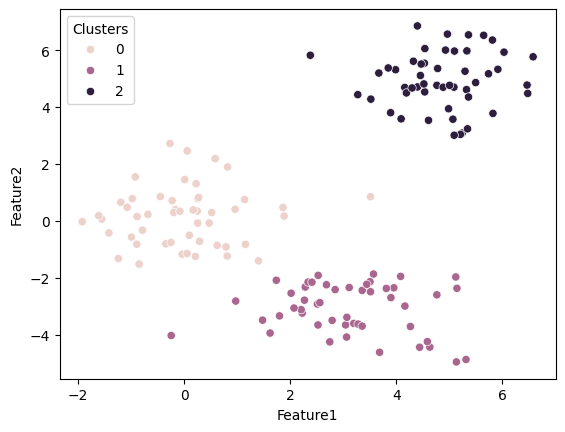

In [29]:
sns.scatterplot(x=clu['Feature1'],y=clu['Feature2'],hue=clu['Clusters'])

Hierarchical Clustering

In [30]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

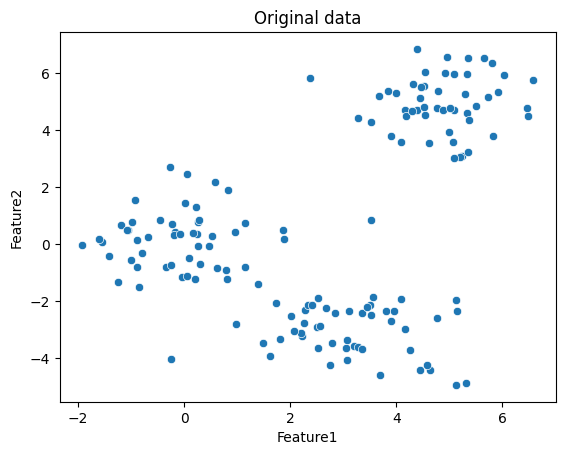

In [34]:
sns.scatterplot(x=clu['Feature1'],y=clu['Feature2'])
plt.title("Original data")
plt.show()

In [35]:
link = linkage(clu,method='ward')

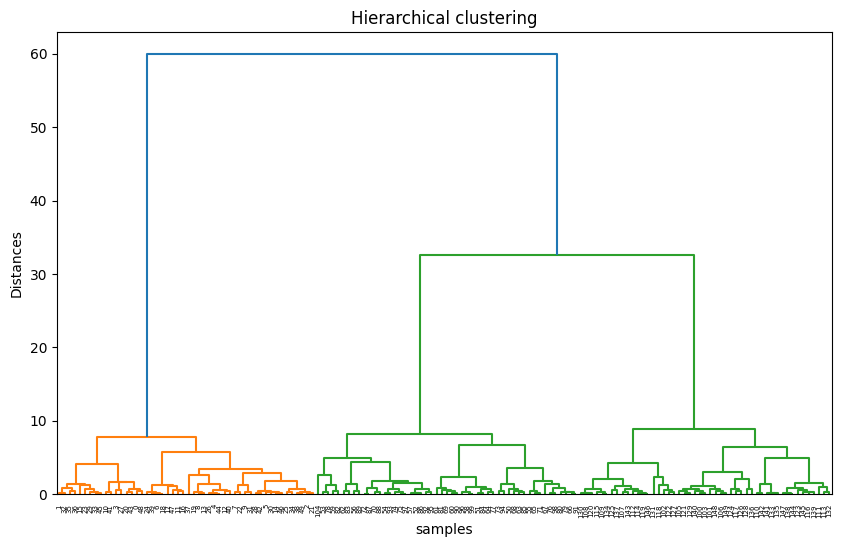

In [36]:
plt.figure(figsize=(10,6))
dendrogram(link)
plt.title("Hierarchical clustering")
plt.xlabel("samples")
plt.ylabel("Distances")
plt.show()

In [38]:
hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
hier.fit(clu)

AgglomerativeClustering(n_clusters=3)

In [43]:
pred1 = hier.fit_predict(clu)

In [44]:
pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
clu['hier_clusters'] = pd.DataFrame(pred1,columns=["hier_clusters"])

In [47]:
clu.head()

,Feature1,Feature2,Clusters,hier_clusters
0,5.496714,4.861736,2,1
1,5.647689,6.523030,2,1
2,4.765847,4.765863,2,1
3,6.579213,5.767435,2,1
4,4.530526,5.542560,2,1


<Axes: xlabel='Feature1', ylabel='Feature2'>

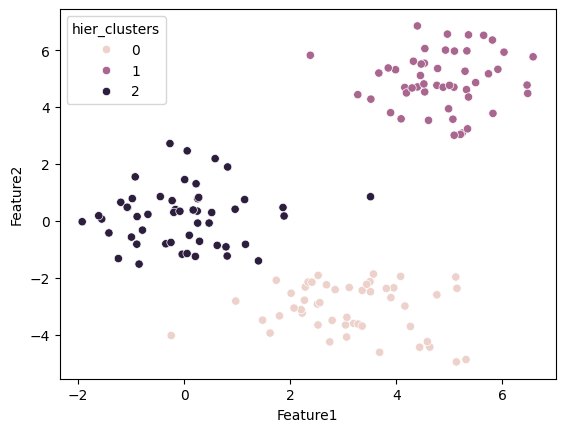

In [48]:
sns.scatterplot(x=clu["Feature1"],y=clu["Feature2"],hue=clu["hier_clusters"])

DBSCAN

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
clu_scaled = scaler.fit_transform(clu)

In [51]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(clu_scaled)

DBSCAN()

In [52]:
clu['dbscan_clusters'] = dbscan.labels_

In [53]:
clu['dbscan_clusters']

,dbscan_clusters
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


<Axes: xlabel='Feature1', ylabel='Feature2'>

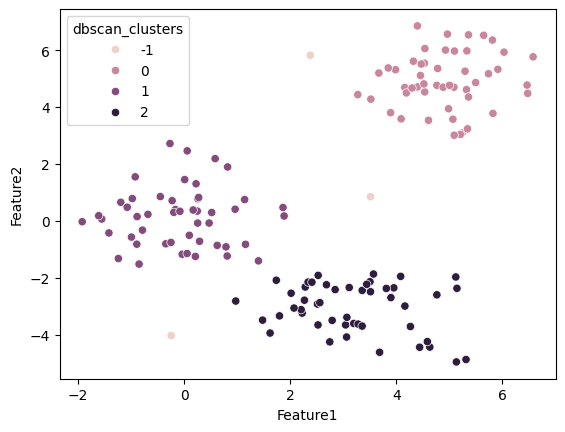

In [54]:
sns.scatterplot(x=clu["Feature1"],y=clu["Feature2"],hue=clu["dbscan_clusters"])